In [1]:
from sklearn import svm
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier


from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


#from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,recall_score
from sklearn.metrics import roc_auc_score,roc_curve,scorer,precision_score
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

In [2]:
df = pd.read_csv('/Users/mariemashraf/Documents/Machinify/OrangeTelecom/Orange_Telecom_Churn_Data.csv')

In [3]:
df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.shape

(5000, 21)

In [5]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')

In [6]:
df.dtypes

state                             object
account_length                     int64
area_code                          int64
phone_number                      object
intl_plan                         object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                             bool
dtype: object

In [7]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
phone_number                     0
intl_plan                        0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churned                          0
dtype: int64

### Droping Some Columns

In [8]:
 df.columns

Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')

In [9]:
df = df.drop(columns=['account_length' , 'phone_number'] , axis=1 )

In [10]:
df.columns

Index(['state', 'area_code', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

In [11]:
df['churned'].value_counts()

False    4293
True      707
Name: churned, dtype: int64

In [12]:
churn     = df[df["churned"] == bool(True)]
not_churn = df[df["churned"] == bool(False)]

# state

In [13]:
df['state'].head()

0    KS
1    OH
2    NJ
3    OH
4    OK
Name: state, dtype: object

In [14]:
df['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [15]:
df.columns

Index(['state', 'area_code', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

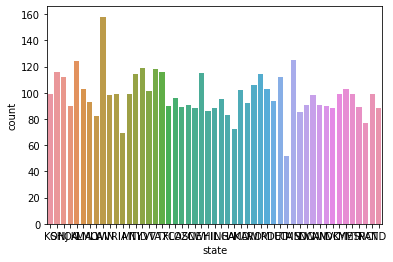

In [16]:
sns.countplot(x='state',data=df)
plt.show()

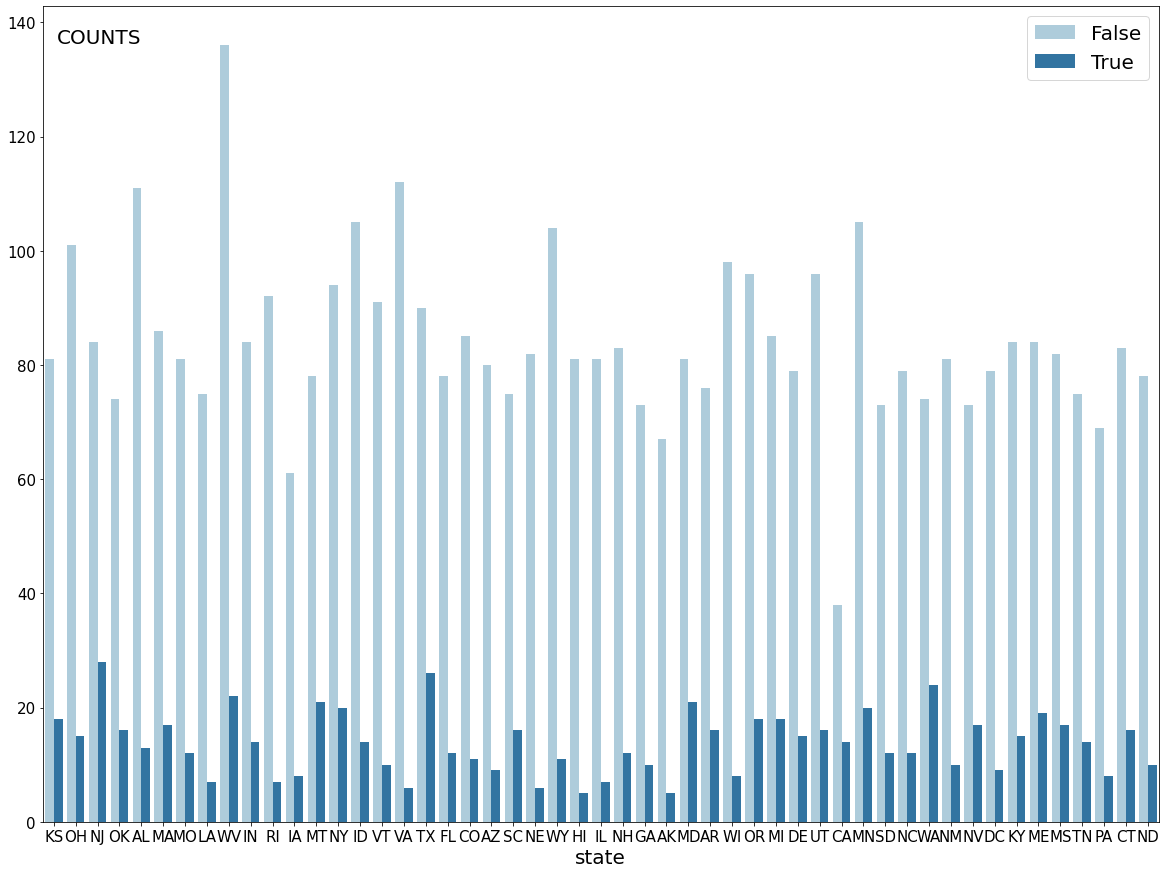

In [17]:
fig, axz = plt.subplots(figsize=(20,15))

axz = sns.countplot(x='state', hue='churned', data=df, palette='Paired')


axz.set_ylabel('COUNTS', rotation=0, labelpad=100,size=20)
axz.set_xlabel('state', size=20)
axz.yaxis.set_label_coords(0.05, 0.95)  # (x, y)
axz.legend(loc=0,fontsize=20);

axz.tick_params(labelsize=15)

<AxesSubplot:xlabel='state', ylabel='churned'>

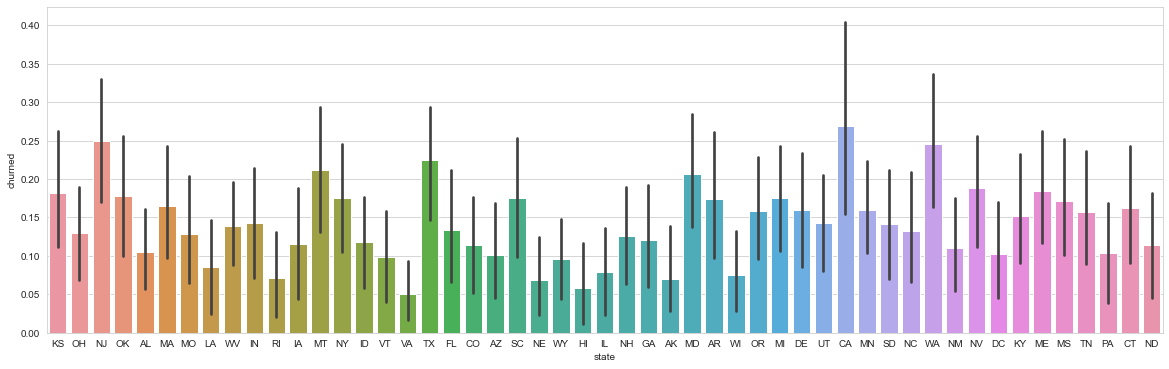

In [18]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.barplot(x='state',y='churned', data=df)

# account_length

In [19]:
#df['account_length'].head()

In [20]:
#df['account_length'].unique()

In [21]:
#sns.distplot(df['account_length'], color = 'red')
#plt.title('Account Length')

In [22]:
#df['account_length'].describe()

# area_code

In [23]:
df['area_code'].head()

0    415
1    415
2    415
3    408
4    415
Name: area_code, dtype: int64

In [24]:
df['area_code'].unique()

array([415, 408, 510])

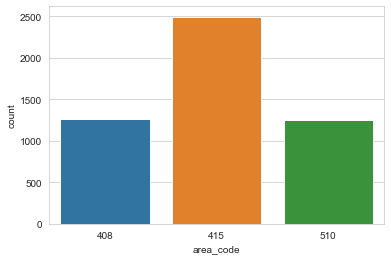

In [25]:
sns.countplot(x='area_code',data=df)
plt.show()

# phone_number

In [26]:
#df['phone_number'].head()

In [27]:
#df['phone_number'].unique()

In [28]:
#df['phone_number'].describe()

# intl_plan

In [29]:
df['intl_plan'].head()

0     no
1     no
2     no
3    yes
4    yes
Name: intl_plan, dtype: object

In [30]:
df['intl_plan'].unique()

array(['no', 'yes'], dtype=object)

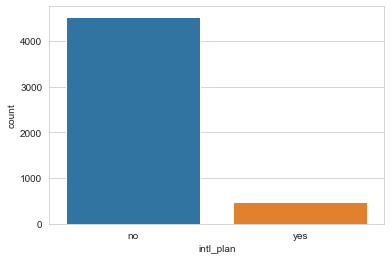

In [31]:
sns.countplot(x='intl_plan',data=df)
plt.show()

# voice_mail_plan

In [32]:
df['voice_mail_plan'].head()

0    yes
1    yes
2     no
3     no
4     no
Name: voice_mail_plan, dtype: object

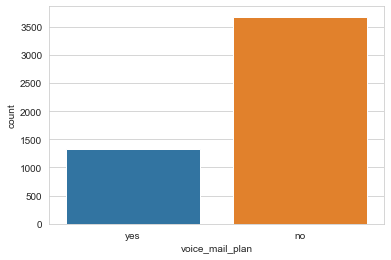

In [33]:
sns.countplot(x='voice_mail_plan',data=df)
plt.show()

# number_vmail_messages

In [34]:
df['number_vmail_messages'].head()

0    25
1    26
2     0
3     0
4     0
Name: number_vmail_messages, dtype: int64

In [35]:
df['number_vmail_messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9,  6, 52])

Text(0.5, 1.0, 'Number Vmail Messages')

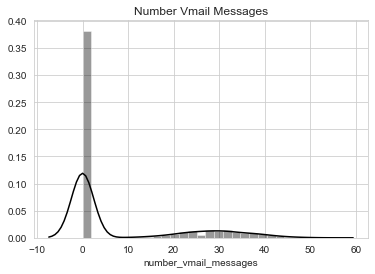

In [36]:
sns.distplot(df['number_vmail_messages'], color = 'black')
plt.title('Number Vmail Messages')

In [37]:
df['number_vmail_messages'].describe()

count    5000.000000
mean        7.755200
std        13.546393
min         0.000000
25%         0.000000
50%         0.000000
75%        17.000000
max        52.000000
Name: number_vmail_messages, dtype: float64

<AxesSubplot:title={'center':'number_vmail_messages'}, xlabel='churned'>

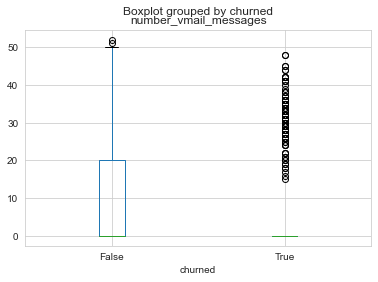

In [38]:
plt.show()
df.boxplot(column='number_vmail_messages', by='churned')

<AxesSubplot:xlabel='churned', ylabel='number_vmail_messages'>

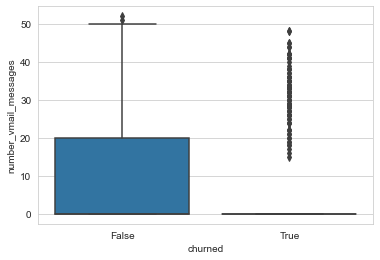

In [39]:
sns.boxplot(x='churned',y='number_vmail_messages', data = df)

# total_day_minutes

In [40]:
df['total_day_minutes'].head()

0    265.1
1    161.6
2    243.4
3    299.4
4    166.7
Name: total_day_minutes, dtype: float64

In [41]:
df['total_day_minutes'].unique()

array([265.1, 161.6, 243.4, ..., 188.7,   7.2, 170. ])

Text(0.5, 1.0, 'Total Day Minutes')

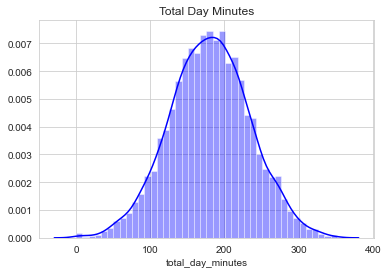

In [42]:
sns.distplot(df['total_day_minutes'], color = 'blue')
plt.title('Total Day Minutes')

In [43]:
df['total_day_minutes'].describe()

count    5000.000000
mean      180.288900
std        53.894699
min         0.000000
25%       143.700000
50%       180.100000
75%       216.200000
max       351.500000
Name: total_day_minutes, dtype: float64

<AxesSubplot:title={'center':'total_day_minutes'}, xlabel='churned'>

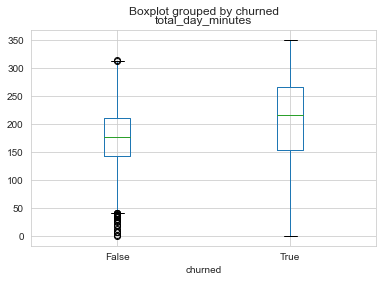

In [44]:
plt.show()
df.boxplot(column='total_day_minutes', by='churned')

<AxesSubplot:xlabel='churned', ylabel='total_day_minutes'>

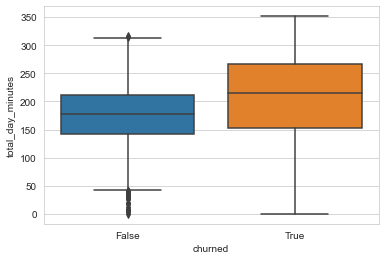

In [45]:
sns.boxplot(x='churned',y='total_day_minutes', data = df)

# total_day_calls

In [46]:
df['total_day_calls'].head()

0    110
1    123
2    114
3     71
4    113
Name: total_day_calls, dtype: int64

In [47]:
df['total_day_calls'].unique()

array([110, 123, 114,  71, 113,  98,  88,  79,  97,  84, 137, 127,  96,
        70,  67, 139,  66,  90, 117,  89, 112, 103,  86,  76, 115,  73,
       109,  95, 105, 121, 118,  94,  80, 128,  64, 106, 102,  85,  82,
        77, 120, 133, 135, 108,  57,  83, 129,  91,  92,  74,  93, 101,
       146,  72,  99, 104, 125,  61, 100,  87, 131,  65, 124, 119,  52,
        68, 107,  47, 116, 151, 126, 122, 111, 145,  78, 136, 140, 148,
        81,  55,  69, 158, 134, 130,  63,  53,  75, 141, 163,  59, 132,
       138,  54,  58,  62, 144, 143, 147,  36,  40, 150,  56,  51, 165,
        30,  48,  60,  42,   0,  45, 160, 149, 152, 142, 156,  35,  49,
       157,  44,  50,  34,  39,  46])

Text(0.5, 1.0, 'Total Day Calls')

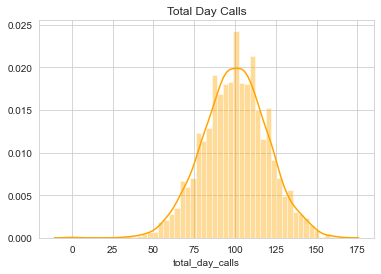

In [48]:
sns.distplot(df['total_day_calls'], color = 'orange')
plt.title('Total Day Calls')

In [49]:
df['total_day_calls'].describe()

count    5000.000000
mean      100.029400
std        19.831197
min         0.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       165.000000
Name: total_day_calls, dtype: float64

<AxesSubplot:title={'center':'total_day_calls'}, xlabel='churned'>

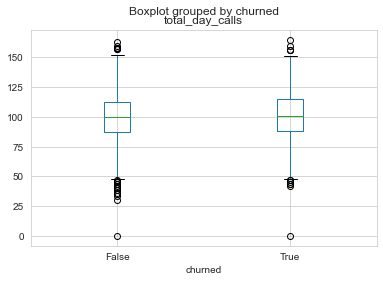

In [50]:
plt.show()
df.boxplot(column='total_day_calls', by='churned')

<AxesSubplot:xlabel='churned', ylabel='total_day_calls'>

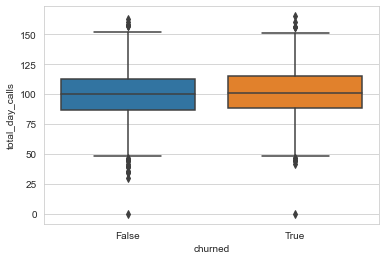

In [51]:
sns.boxplot(x='churned',y='total_day_calls', data = df)

# total_day_charge

In [52]:
df['total_day_charge'].head()

0    45.07
1    27.47
2    41.38
3    50.90
4    28.34
Name: total_day_charge, dtype: float64

In [53]:
df['total_day_charge'].unique()

array([45.07, 27.47, 41.38, ..., 32.08,  1.22, 28.9 ])

Text(0.5, 1.0, 'Total Day Charge')

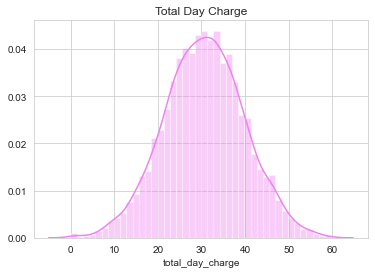

In [54]:
sns.distplot(df['total_day_charge'], color = 'violet')
plt.title('Total Day Charge')

In [55]:
df['total_day_charge'].describe()

count    5000.000000
mean       30.649668
std         9.162069
min         0.000000
25%        24.430000
50%        30.620000
75%        36.750000
max        59.760000
Name: total_day_charge, dtype: float64

<AxesSubplot:title={'center':'total_day_charge'}, xlabel='churned'>

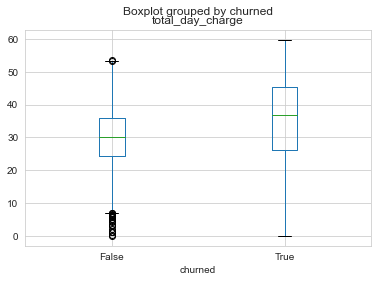

In [56]:
plt.show()
df.boxplot(column='total_day_charge', by='churned')

<AxesSubplot:xlabel='churned', ylabel='total_day_charge'>

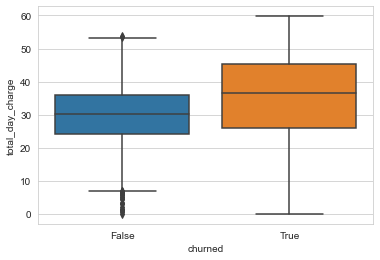

In [57]:
sns.boxplot(x='churned',y='total_day_charge', data = df)

# total_eve_minutes

In [58]:
df['total_eve_minutes'].head()

0    197.4
1    195.5
2    121.2
3     61.9
4    148.3
Name: total_eve_minutes, dtype: float64

In [59]:
df['total_eve_minutes'].unique()

array([197.4, 195.5, 121.2, ..., 302.3, 280.6, 340.3])

Text(0.5, 1.0, 'Total Day Minutes')

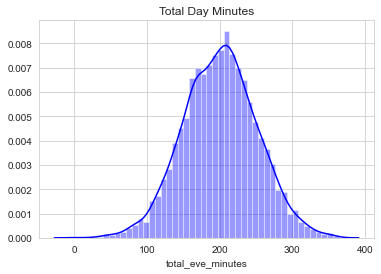

In [60]:
sns.distplot(df['total_eve_minutes'], color = 'blue')
plt.title('Total Day Minutes')

In [61]:
df['total_eve_minutes'].describe()

count    5000.000000
mean      200.636560
std        50.551309
min         0.000000
25%       166.375000
50%       201.000000
75%       234.100000
max       363.700000
Name: total_eve_minutes, dtype: float64

<AxesSubplot:title={'center':'total_eve_minutes'}, xlabel='churned'>

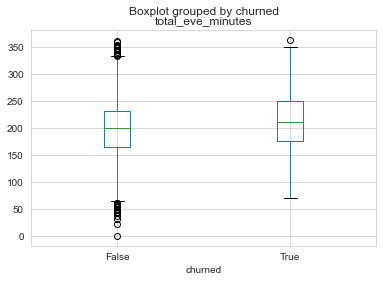

In [62]:
plt.show()
df.boxplot(column='total_eve_minutes', by='churned')

<AxesSubplot:xlabel='churned', ylabel='total_eve_minutes'>

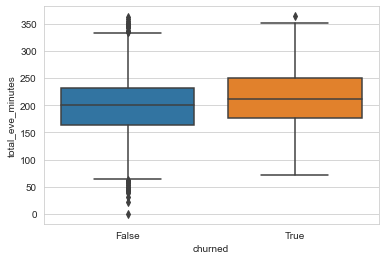

In [63]:
sns.boxplot(x='churned',y='total_eve_minutes', data = df)

# total_eve_calls

In [64]:
df['total_eve_calls'].head()

0     99
1    103
2    110
3     88
4    122
Name: total_eve_calls, dtype: int64

In [65]:
df['total_eve_calls'].unique()

array([ 99, 103, 110,  88, 122, 101, 108,  94,  80, 111,  83, 148,  71,
        75,  76,  97,  90,  65,  93, 121, 102,  72, 112, 100,  84, 109,
        63, 107, 115, 119, 116,  92,  85,  98, 118,  74, 117,  58,  96,
        66,  67,  62,  77, 164, 126, 142,  64, 104,  79,  95,  86, 105,
        81, 113, 106,  59,  48,  82,  87, 123, 114, 140, 128,  60,  78,
       125,  91,  46, 138, 129,  89, 133, 136,  57, 135, 139,  51,  70,
       151, 137, 134,  73, 152, 168,  68, 120,  69, 127, 132, 143,  61,
       124,  42,  54, 131,  52, 149,  56,  37, 130,  49, 146, 147,  55,
        12,  50, 157, 155,  45, 144,  36, 156,  53, 141,  44, 153, 154,
       150,  43,   0, 145, 159, 170,  47, 169,  38])

Text(0.5, 1.0, 'Total Eve Calls')

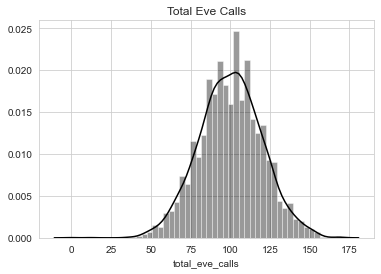

In [66]:
sns.distplot(df['total_eve_calls'], color = 'black')
plt.title('Total Eve Calls')

In [67]:
df['total_eve_calls'].describe()

count    5000.000000
mean      100.191000
std        19.826496
min         0.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       170.000000
Name: total_eve_calls, dtype: float64

<AxesSubplot:title={'center':'total_eve_calls'}, xlabel='churned'>

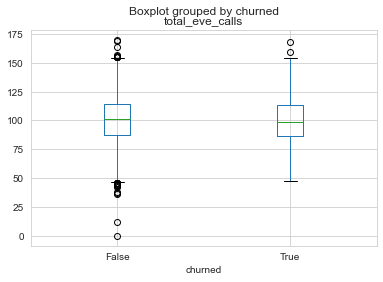

In [68]:
plt.show()
df.boxplot(column='total_eve_calls', by='churned')

<AxesSubplot:xlabel='churned', ylabel='total_eve_calls'>

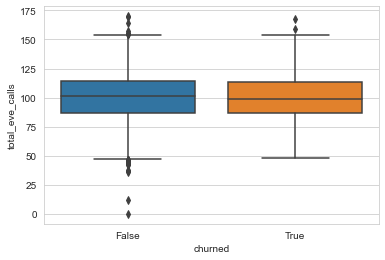

In [69]:
sns.boxplot(x='churned',y='total_eve_calls', data = df)

# total_eve_charge

In [70]:
df['total_eve_charge'].head()

0    16.78
1    16.62
2    10.30
3     5.26
4    12.61
Name: total_eve_charge, dtype: float64

In [71]:
df['total_eve_charge'].unique()

array([16.78, 16.62, 10.3 , ..., 25.7 , 23.85, 28.93])

Text(0.5, 1.0, 'Total Eve Charge')

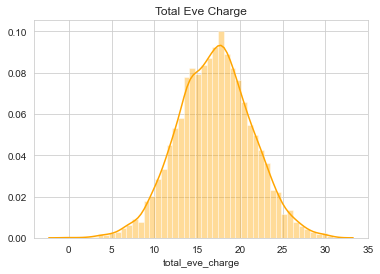

In [72]:
sns.distplot(df['total_eve_charge'], color = 'orange')
plt.title('Total Eve Charge')

In [73]:
df['total_eve_charge'].describe()

count    5000.000000
mean       17.054322
std         4.296843
min         0.000000
25%        14.140000
50%        17.090000
75%        19.900000
max        30.910000
Name: total_eve_charge, dtype: float64

<AxesSubplot:title={'center':'total_eve_charge'}, xlabel='churned'>

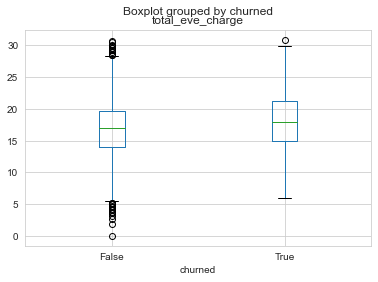

In [74]:
plt.show()
df.boxplot(column='total_eve_charge', by='churned')

<AxesSubplot:xlabel='churned', ylabel='total_eve_charge'>

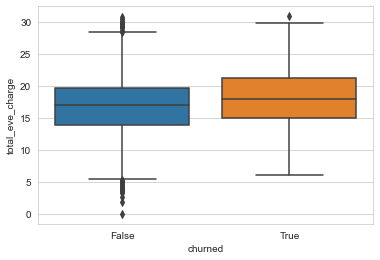

In [75]:
sns.boxplot(x='churned',y='total_eve_charge', data = df)

# total_night_minutes

In [76]:
df['total_night_minutes'].head()

0    244.7
1    254.4
2    162.6
3    196.9
4    186.9
Name: total_night_minutes, dtype: float64

In [77]:
df['total_night_minutes'].unique()

array([244.7, 254.4, 162.6, ...,  75.1, 297.5, 224.4])

Text(0.5, 1.0, 'Total Eve Minutes')

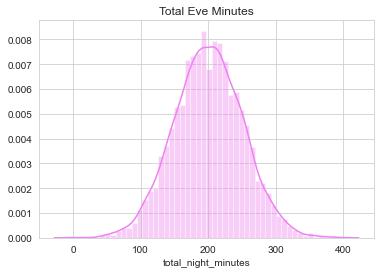

In [78]:
sns.distplot(df['total_night_minutes'], color = 'violet')
plt.title('Total Eve Minutes')

In [79]:
df['total_night_minutes'].describe()

count    5000.000000
mean      200.391620
std        50.527789
min         0.000000
25%       166.900000
50%       200.400000
75%       234.700000
max       395.000000
Name: total_night_minutes, dtype: float64

<AxesSubplot:title={'center':'total_night_minutes'}, xlabel='churned'>

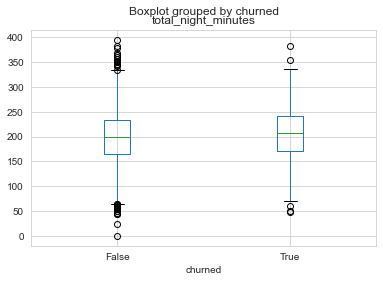

In [80]:
plt.show()
df.boxplot(column='total_night_minutes', by='churned')

<AxesSubplot:xlabel='churned', ylabel='total_night_minutes'>

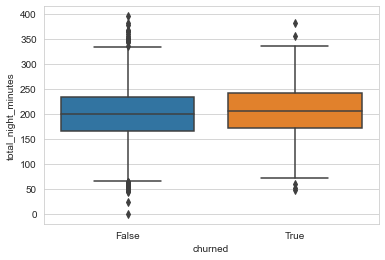

In [81]:
sns.boxplot(x='churned',y='total_night_minutes', data = df)

# total_night_calls

In [82]:
df['total_night_calls'].head()

0     91
1    103
2    104
3     89
4    121
Name: total_night_calls, dtype: int64

In [83]:
df['total_night_calls'].unique()

array([ 91, 103, 104,  89, 121, 118,  96,  90,  97, 111,  94, 128, 115,
        99,  75, 108,  74, 133,  64,  78, 105,  68, 102, 148,  98, 116,
        71, 109, 107, 135,  92,  86, 127,  79,  87, 129,  57,  77,  95,
        54, 106,  53,  67, 139,  60, 100,  61,  73, 113,  76, 119,  88,
        84,  62, 137,  72, 142, 114, 126, 122,  81, 123, 117,  82,  80,
       120, 130, 134,  59, 112, 132, 110, 101, 150,  69, 131,  83,  93,
       124, 136, 125,  66, 143,  58,  55,  85,  56,  70,  46,  42, 152,
        44, 145,  50, 153,  49, 175,  63, 138, 154, 140, 141, 146,  65,
        51, 151, 158, 155, 157, 147, 144, 149, 166,  52,  33, 156,  38,
        36,  48, 164,  40, 168, 161, 159, 160, 170,  41,  12, 165,  43,
         0])

Text(0.5, 1.0, 'Total Nught Calls')

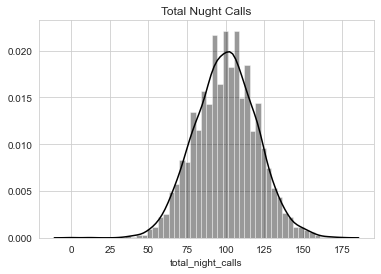

In [84]:
sns.distplot(df['total_night_calls'], color = 'black')
plt.title('Total Nught Calls')

In [85]:
df['total_night_calls'].describe()

count    5000.000000
mean       99.919200
std        19.958686
min         0.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       175.000000
Name: total_night_calls, dtype: float64

<AxesSubplot:title={'center':'total_night_calls'}, xlabel='churned'>

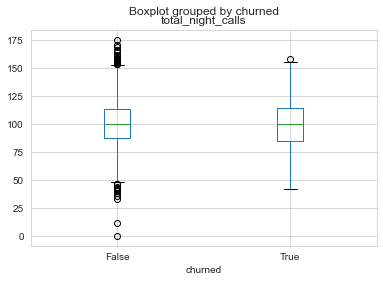

In [86]:
plt.show()
df.boxplot(column='total_night_calls', by='churned')

<AxesSubplot:xlabel='churned', ylabel='total_night_calls'>

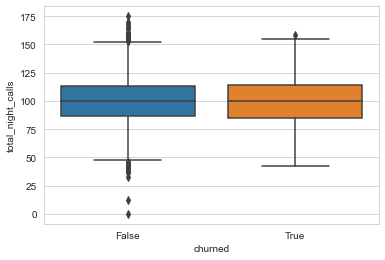

In [87]:
sns.boxplot(x='churned',y='total_night_calls', data = df)

# total_night_charge

In [88]:
df['total_night_charge'].head()

0    11.01
1    11.45
2     7.32
3     8.86
4     8.41
Name: total_night_charge, dtype: float64

In [89]:
df['total_night_charge'].unique()

array([11.01, 11.45,  7.32, ...,  4.65,  3.65,  3.38])

Text(0.5, 1.0, 'Total Nught Charge')

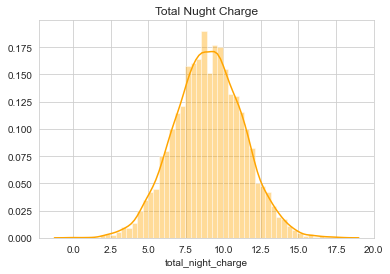

In [90]:
sns.distplot(df['total_night_charge'], color = 'orange')
plt.title('Total Nught Charge')

In [91]:
df['total_night_charge'].describe()

count    5000.000000
mean        9.017732
std         2.273763
min         0.000000
25%         7.510000
50%         9.020000
75%        10.560000
max        17.770000
Name: total_night_charge, dtype: float64

<AxesSubplot:title={'center':'total_night_charge'}, xlabel='churned'>

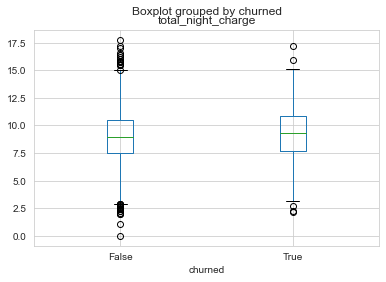

In [92]:
plt.show()
df.boxplot(column='total_night_charge', by='churned')

<AxesSubplot:xlabel='churned', ylabel='total_night_charge'>

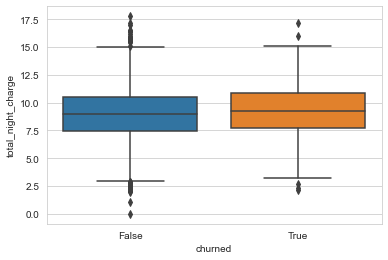

In [93]:
sns.boxplot(x='churned',y='total_night_charge', data = df)

# total_intl_minutes

In [94]:
df['total_intl_minutes'].head()

0    10.0
1    13.7
2    12.2
3     6.6
4    10.1
Name: total_intl_minutes, dtype: float64

In [95]:
df['total_intl_minutes'].unique()

array([10. , 13.7, 12.2,  6.6, 10.1,  6.3,  7.5,  7.1,  8.7, 11.2, 12.7,
        9.1, 12.3, 13.1,  5.4, 13.8,  8.1, 13. , 10.6,  5.7,  9.5,  7.7,
       10.3, 15.5, 14.7, 11.1, 14.2, 12.6, 11.8,  8.3, 14.5, 10.5,  9.4,
       14.6,  9.2,  3.5,  8.5, 13.2,  7.4,  8.8, 11. ,  7.8,  6.8, 11.4,
        9.3,  9.7, 10.2,  8. ,  5.8, 12.1, 12. , 11.6,  8.2,  6.2,  7.3,
        6.1, 11.7, 15. ,  9.8, 12.4,  8.6, 10.9, 13.9,  8.9,  7.9,  5.3,
        4.4, 12.5, 11.3,  9. ,  9.6, 13.3, 20. ,  7.2,  6.4, 14.1, 14.3,
        6.9, 11.5, 15.8, 12.8, 16.2,  0. , 11.9,  9.9,  8.4, 10.8, 13.4,
       10.7, 17.6,  4.7,  2.7, 13.5, 12.9, 14.4, 10.4,  6.7, 15.4,  4.5,
        6.5, 15.6,  5.9, 18.9,  7.6,  5. ,  7. , 14. , 18. , 16. , 14.8,
        3.7,  2. ,  4.8, 15.3,  6. , 13.6, 17.2, 17.5,  5.6, 18.2,  3.6,
       16.5,  4.6,  5.1,  4.1, 16.3, 14.9, 16.4, 16.7,  1.3, 15.2, 15.1,
       15.9,  5.5, 16.1,  4. , 16.9,  5.2,  4.2, 15.7, 17. ,  3.9,  3.8,
        2.2, 17.1,  4.9, 17.9, 17.3, 18.4, 17.8,  4

Text(0.5, 1.0, 'Total Intl Minutes')

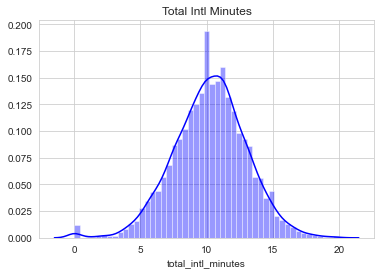

In [96]:
sns.distplot(df['total_intl_minutes'], color = 'blue')
plt.title('Total Intl Minutes')

In [97]:
df['total_intl_minutes'].describe()

count    5000.000000
mean       10.261780
std         2.761396
min         0.000000
25%         8.500000
50%        10.300000
75%        12.000000
max        20.000000
Name: total_intl_minutes, dtype: float64

<AxesSubplot:title={'center':'total_intl_minutes'}, xlabel='churned'>

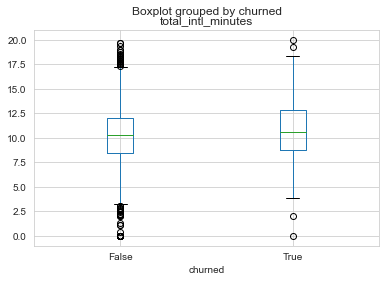

In [98]:
plt.show()
df.boxplot(column='total_intl_minutes', by='churned')

<AxesSubplot:xlabel='churned', ylabel='total_intl_minutes'>

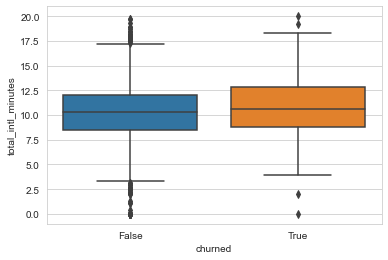

In [99]:
sns.boxplot(x='churned',y='total_intl_minutes', data = df)

# total_intl_calls

In [100]:
df['total_intl_calls'].head()

0    3
1    3
2    5
3    7
4    3
Name: total_intl_calls, dtype: int64

In [101]:
df['total_intl_calls'].unique()

array([ 3,  5,  7,  6,  4,  2,  9, 19,  1, 10, 15,  8, 11,  0, 12, 13, 18,
       14, 16, 20, 17])

Text(0.5, 1.0, 'Total Intl Calls')

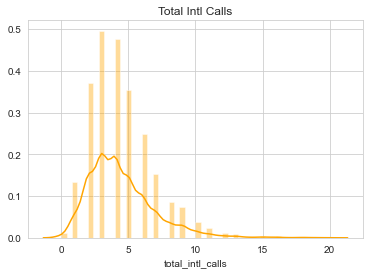

In [102]:
sns.distplot(df['total_intl_calls'], color = 'orange')
plt.title('Total Intl Calls')

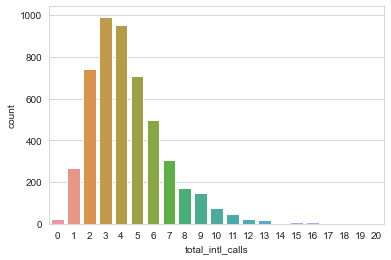

In [103]:
sns.countplot(x='total_intl_calls',data=df)
plt.show()

In [104]:
df['total_intl_calls'].describe()

count    5000.000000
mean        4.435200
std         2.456788
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: total_intl_calls, dtype: float64

<AxesSubplot:title={'center':'total_intl_calls'}, xlabel='churned'>

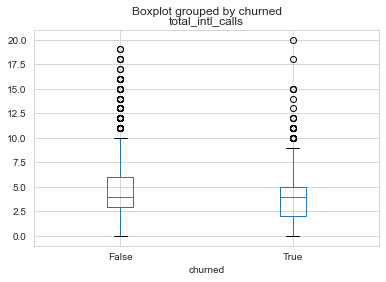

In [105]:
plt.show()
df.boxplot(column='total_intl_calls', by='churned')

<AxesSubplot:xlabel='churned', ylabel='total_intl_calls'>

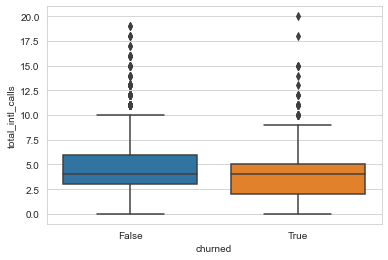

In [106]:
sns.boxplot(x='churned',y='total_intl_calls', data = df)

# total_intl_charge

In [107]:
df['total_intl_charge'].head()

0    2.70
1    3.70
2    3.29
3    1.78
4    2.73
Name: total_intl_charge, dtype: float64

In [108]:
df['total_intl_charge'].unique()

array([2.7 , 3.7 , 3.29, 1.78, 2.73, 1.7 , 2.03, 1.92, 2.35, 3.02, 3.43,
       2.46, 3.32, 3.54, 1.46, 3.73, 2.19, 3.51, 2.86, 1.54, 2.57, 2.08,
       2.78, 4.19, 3.97, 3.  , 3.83, 3.4 , 3.19, 2.24, 3.92, 2.84, 2.54,
       3.94, 2.48, 0.95, 2.3 , 3.56, 2.  , 2.38, 2.97, 2.11, 1.84, 3.08,
       2.51, 2.62, 2.75, 2.16, 1.57, 3.27, 3.24, 3.13, 2.21, 1.67, 1.97,
       1.65, 3.16, 4.05, 2.65, 3.35, 2.32, 2.94, 3.75, 2.4 , 2.13, 1.43,
       1.19, 3.38, 3.05, 2.43, 2.59, 3.59, 5.4 , 1.94, 1.73, 3.81, 3.86,
       1.86, 3.11, 4.27, 3.46, 4.37, 0.  , 3.21, 2.67, 2.27, 2.92, 3.62,
       2.89, 4.75, 1.27, 0.73, 3.65, 3.48, 3.89, 2.81, 1.81, 4.16, 1.22,
       1.76, 4.21, 1.59, 5.1 , 2.05, 1.35, 1.89, 3.78, 4.86, 4.32, 4.  ,
       1.  , 0.54, 1.3 , 4.13, 1.62, 3.67, 4.64, 4.73, 1.51, 4.91, 0.97,
       4.46, 1.24, 1.38, 1.11, 4.4 , 4.02, 4.43, 4.51, 0.35, 4.1 , 4.08,
       4.29, 1.49, 4.35, 1.08, 4.56, 1.4 , 1.13, 4.24, 4.59, 1.05, 1.03,
       0.59, 4.62, 1.32, 4.83, 4.67, 4.97, 4.81, 1.

Text(0.5, 1.0, 'Total Intl Charge')

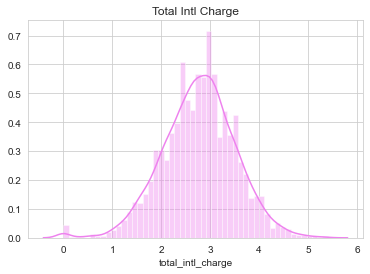

In [109]:
sns.distplot(df['total_intl_charge'], color = 'violet')
plt.title('Total Intl Charge')

In [110]:
df['total_intl_charge'].describe()

count    5000.000000
mean        2.771196
std         0.745514
min         0.000000
25%         2.300000
50%         2.780000
75%         3.240000
max         5.400000
Name: total_intl_charge, dtype: float64

<AxesSubplot:title={'center':'total_intl_charge'}, xlabel='churned'>

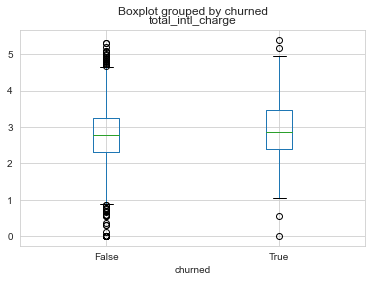

In [111]:
plt.show()
df.boxplot(column='total_intl_charge', by='churned')

<AxesSubplot:xlabel='churned', ylabel='total_intl_charge'>

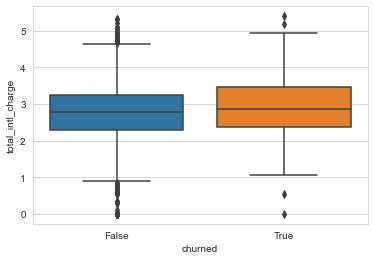

In [112]:
sns.boxplot(x='churned',y='total_intl_charge', data = df)

# number_customer_service_calls

In [113]:
df['number_customer_service_calls'].head()

0    1
1    1
2    0
3    2
4    3
Name: number_customer_service_calls, dtype: int64

In [114]:
df['number_customer_service_calls'].unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8])

Text(0.5, 1.0, 'Number Customer Service Calls')

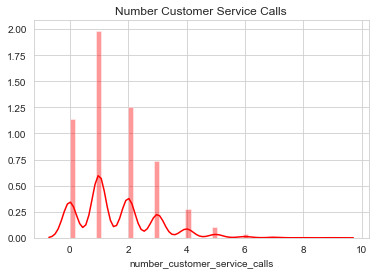

In [115]:
sns.distplot(df['number_customer_service_calls'], color = 'red')
plt.title('Number Customer Service Calls')

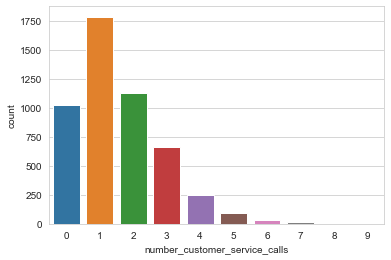

In [116]:
sns.countplot(x='number_customer_service_calls',data=df)
plt.show()

In [117]:
df['number_customer_service_calls'].describe()

count    5000.000000
mean        1.570400
std         1.306363
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: number_customer_service_calls, dtype: float64

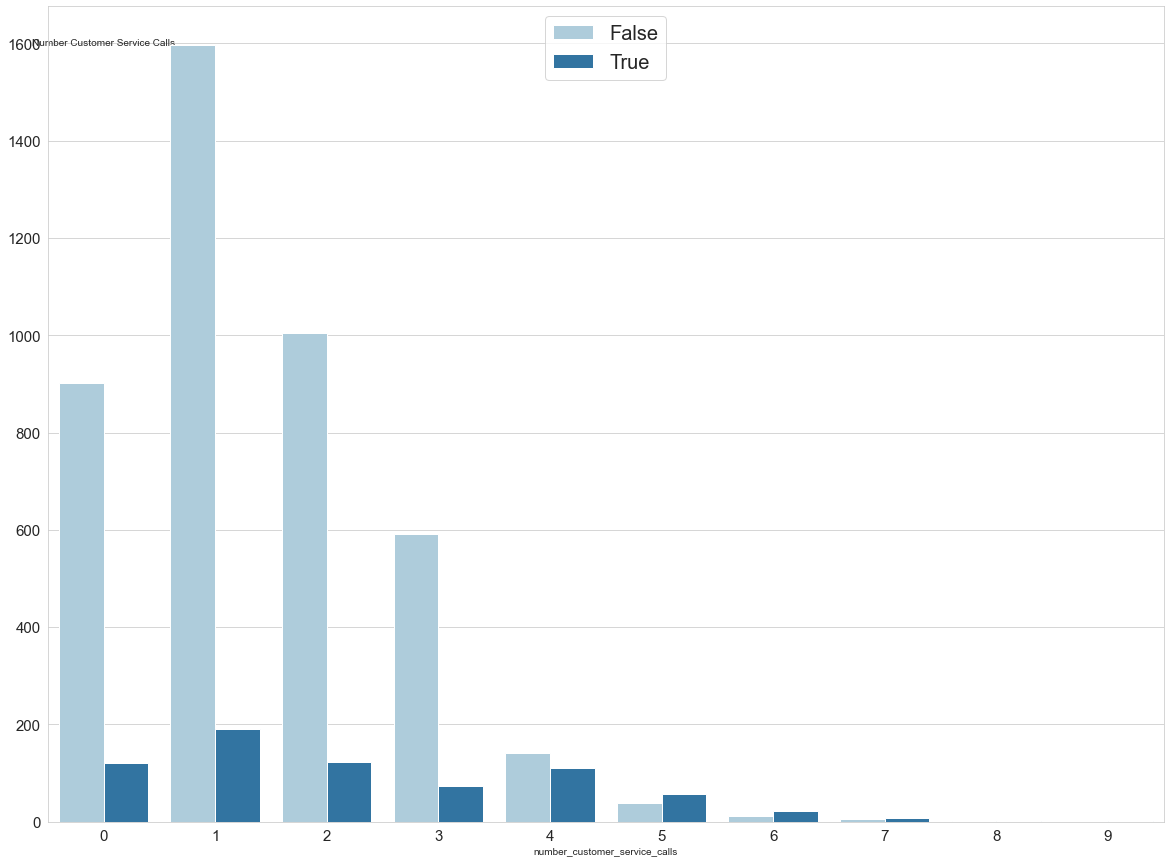

In [118]:
fig, axz = plt.subplots(figsize=(20,15))

axz = sns.countplot(x='number_customer_service_calls', hue='churned', data=df, palette='Paired')


axz.set_ylabel('Number Customer Service Calls', rotation=0, labelpad=100,size=10)
axz.set_xlabel('number_customer_service_calls', size=10)
axz.yaxis.set_label_coords(0.05, 0.95)  # (x, y)
axz.legend(loc=0,fontsize=20);

axz.tick_params(labelsize=15)

<AxesSubplot:xlabel='number_customer_service_calls', ylabel='churned'>

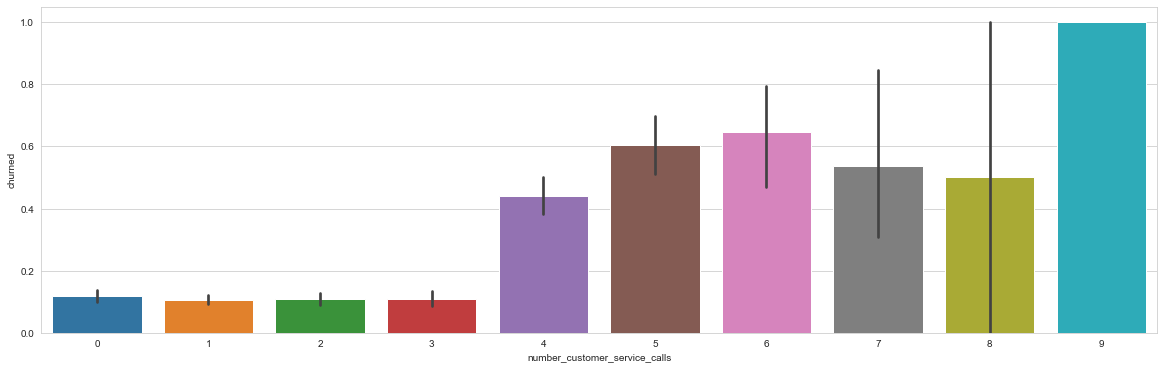

In [119]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.barplot(x='number_customer_service_calls',y='churned', data=df)

# Label Encoding

In [120]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [121]:
df[['state' , 'intl_plan' ,'area_code', 'voice_mail_plan' , 'voice_mail_plan' , 'churned']] = df[['state' , 'intl_plan' ,'area_code', 'voice_mail_plan' , 'voice_mail_plan' , 'churned']].apply(LabelEncoder().fit_transform)

# churned

In [122]:
df['churned'].head()

0    0
1    0
2    0
3    0
4    0
Name: churned, dtype: int64

In [123]:
df['churned'].unique()

array([0, 1])

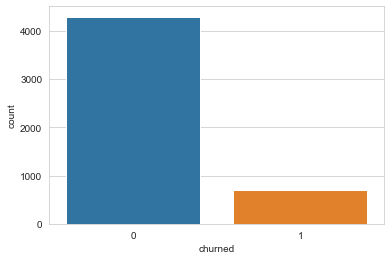

In [124]:
sns.countplot(x='churned',data=df)
plt.show()

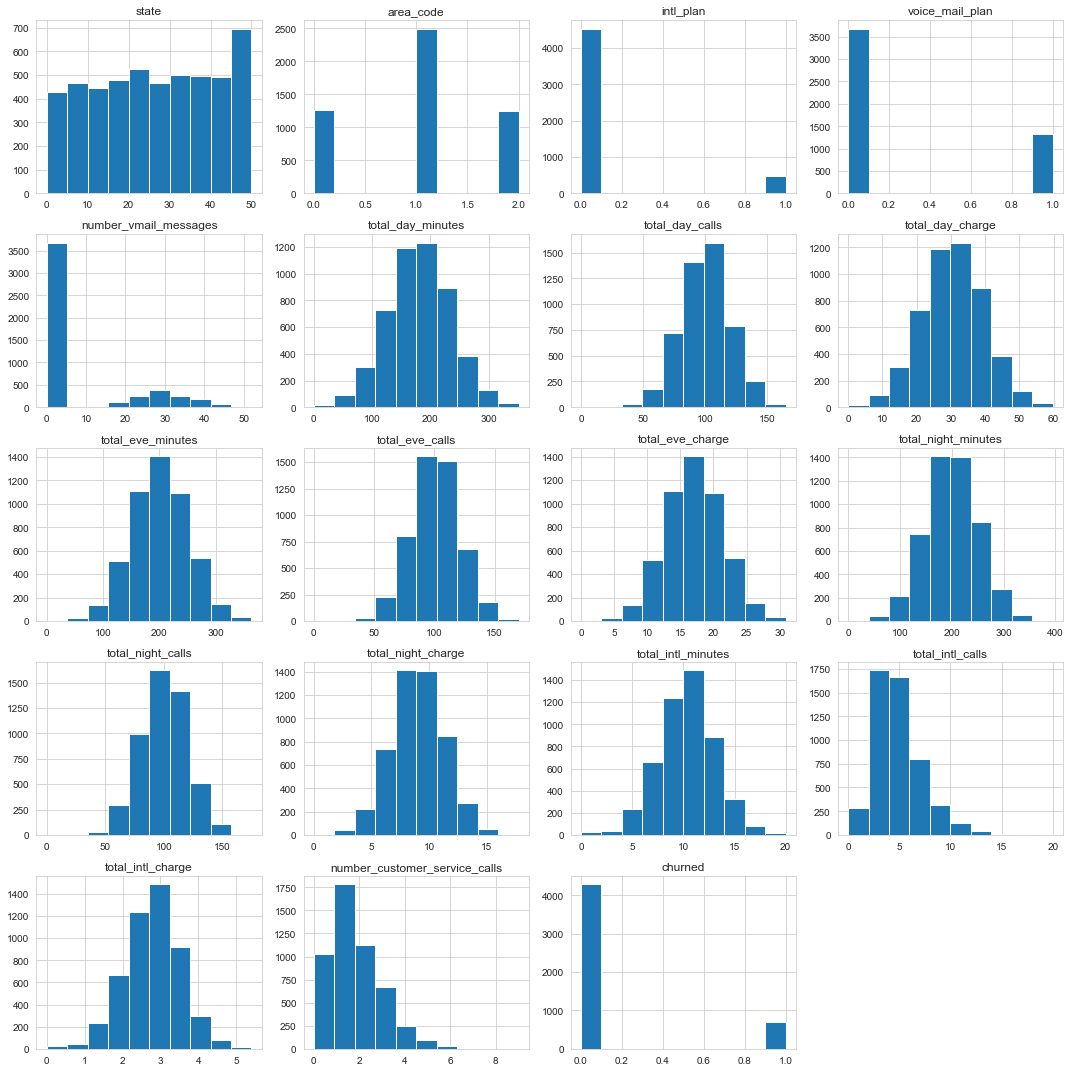

In [125]:
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(df,ax=ax)
plt.tight_layout();

# Normalization

In [126]:
df.head()

,state,area_code,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,16,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [127]:
df.columns

Index(['state', 'area_code', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

In [128]:
df.describe()

,state,area_code,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,0.99740,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,0.70788,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,0.00000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,1.00000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,1.00000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,2.00000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [129]:
cols_to_norm = ['state' , 'number_vmail_messages' , 'total_day_minutes' , 'total_day_calls' , 'total_day_charge' ,
                'total_eve_minutes' , 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls',
                'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
                'total_intl_charge', 'number_customer_service_calls']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Try before feature selection 

In [130]:
X1 = df.drop(columns=['churned'] , axis=1 )
y1 = df['churned']

In [185]:
def Model_bef_SMOTE(model , x,y):
    x1_train , x1_test ,y1_train , y1_test = train_test_split(X1,y1,test_size = 0.25 , random_state=42)
    model.fit(x1_train ,y1_train)
    y_pred = model.predict(x1_test)
    print("Accuarcy For Your Model" ,model.score( x1_test , y1_test )*100)
    score = cross_val_score(model,x,y,cv=5)
    print("Cross Validation For Your Model" , np.mean(score)*100)
    
    R2_regression = round(r2_score(y1_test, y_pred),4)
    print("R2 Regression For Your Model" , R2_regression)
    MAE_regression = int(mean_absolute_error(y1_test,y_pred))
    print("Mean Absolute Error For Your Model" , MAE_regression)
    
    print("Confusion Matrix" , confusion_matrix(y1_test,y_pred))
    print("F1 score" , f1_score(y1_test,y_pred))
    
    print('Accuracy:', accuracy_score(y1_test, y_pred))
    print('Recall:', recall_score(y1_test, y_pred))
    print('Precision:', precision_score(y1_test, y_pred))
    print('\n clasification report:\n', classification_report(y1_test,y_pred))
    print('\n confussion matrix:\n',confusion_matrix(y1_test, y_pred))
    pd.crosstab(y1_test,y_pred)

# SMOTE

In [132]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()

In [133]:
def calssify_AFT_SMOTE(model , x,y):
    x1_train , x1_test ,y1_train , y1_test = train_test_split(X1,y1,test_size = 0.25 , random_state=42)
    x1_train_smote , y1_train_smote = smote.fit_sample(x1_train, y1_train)
    model.fit(x1_train_smote ,y1_train_smote)
    y_pred = model.predict(x1_test)
    print("Accuarcy For Your Model" ,model.score( x1_test , y1_test )*100)
    score = cross_val_score(model,x,y,cv=5)
    print("Cross Validation For Your Model" , np.mean(score)*100)
    
    R2_regression = round(r2_score(y1_test, y_pred),4)
    print("R2 Regression For Your Model" , R2_regression)
    MAE_regression = int(mean_absolute_error(y1_test,y_pred))
    print("Mean Absolute Error For Your Model" , MAE_regression)
    
    print("Confusion Matrix" , confusion_matrix(y1_test,y_pred))
    print("F1 score" , f1_score(y1_test,y_pred))
    
    print('Accuracy:', accuracy_score(y1_test, y_pred))
    print('Recall:', recall_score(y1_test, y_pred))
    print('Precision:', precision_score(y1_test, y_pred))
    print('\n clasification report:\n', classification_report(y1_test,y_pred))
    print('\n confussion matrix:\n',confusion_matrix(y1_test, y_pred))
    pd.crosstab(y1_test,y_pred)

In [134]:
X1.columns

Index(['state', 'area_code', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls'],
      dtype='object')

### LogisticRegression SMOTE

In [135]:
model = LogisticRegression()
Model_bef_SMOTE(model,X1,y1)

Accuarcy For Your Model 87.12
Cross Validation For Your Model 86.62
R2 Regression For Your Model -0.0749
Mean Absolute Error For Your Model 0
Confusion Matrix [[1047   29]
 [ 132   42]]
F1 score 0.34285714285714286
Accuracy: 0.8712
Recall: 0.2413793103448276
Precision: 0.5915492957746479

 clasification report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1076
           1       0.59      0.24      0.34       174

    accuracy                           0.87      1250
   macro avg       0.74      0.61      0.64      1250
weighted avg       0.85      0.87      0.85      1250


 confussion matrix:
 [[1047   29]
 [ 132   42]]


In [136]:
model = LogisticRegression()
calssify_AFT_SMOTE(model,X1,y1)

Accuarcy For Your Model 77.36
Cross Validation For Your Model 86.62
R2 Regression For Your Model -0.8894
Mean Absolute Error For Your Model 0
Confusion Matrix [[831 245]
 [ 38 136]]
F1 score 0.49009009009009014
Accuracy: 0.7736
Recall: 0.7816091954022989
Precision: 0.3569553805774278

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.77      0.85      1076
           1       0.36      0.78      0.49       174

    accuracy                           0.77      1250
   macro avg       0.66      0.78      0.67      1250
weighted avg       0.87      0.77      0.80      1250


 confussion matrix:
 [[831 245]
 [ 38 136]]


### DecisionTreeClassifier

In [137]:
model = DecisionTreeClassifier()
Model_bef_SMOTE(model,X1,y1)

Accuarcy For Your Model 91.60000000000001
Cross Validation For Your Model 91.58000000000001
R2 Regression For Your Model 0.299
Mean Absolute Error For Your Model 0
Confusion Matrix [[1018   58]
 [  47  127]]
F1 score 0.7075208913649026
Accuracy: 0.916
Recall: 0.7298850574712644
Precision: 0.6864864864864865

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1076
           1       0.69      0.73      0.71       174

    accuracy                           0.92      1250
   macro avg       0.82      0.84      0.83      1250
weighted avg       0.92      0.92      0.92      1250


 confussion matrix:
 [[1018   58]
 [  47  127]]


In [138]:
model = DecisionTreeClassifier(max_depth = 9, random_state = 123,splitter = "best", criterion = "gini")
Model_bef_SMOTE(model,X1,y1)

Accuarcy For Your Model 94.48
Cross Validation For Your Model 94.04
R2 Regression For Your Model 0.5393
Mean Absolute Error For Your Model 0
Confusion Matrix [[1061   15]
 [  54  120]]
F1 score 0.7766990291262136
Accuracy: 0.9448
Recall: 0.6896551724137931
Precision: 0.8888888888888888

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1076
           1       0.89      0.69      0.78       174

    accuracy                           0.94      1250
   macro avg       0.92      0.84      0.87      1250
weighted avg       0.94      0.94      0.94      1250


 confussion matrix:
 [[1061   15]
 [  54  120]]


In [139]:
model = DecisionTreeClassifier()
calssify_AFT_SMOTE(model,X1,y1)

Accuarcy For Your Model 88.48
Cross Validation For Your Model 91.96000000000002
R2 Regression For Your Model 0.0386
Mean Absolute Error For Your Model 0
Confusion Matrix [[973 103]
 [ 41 133]]
F1 score 0.6487804878048781
Accuracy: 0.8848
Recall: 0.764367816091954
Precision: 0.5635593220338984

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      1076
           1       0.56      0.76      0.65       174

    accuracy                           0.88      1250
   macro avg       0.76      0.83      0.79      1250
weighted avg       0.90      0.88      0.89      1250


 confussion matrix:
 [[973 103]
 [ 41 133]]


In [140]:
model = DecisionTreeClassifier(max_depth = 9, random_state = 123,splitter = "best", criterion = "gini")
calssify_AFT_SMOTE(model,X1,y1)

Accuarcy For Your Model 92.32000000000001
Cross Validation For Your Model 94.04
R2 Regression For Your Model 0.3591
Mean Absolute Error For Your Model 0
Confusion Matrix [[1023   53]
 [  43  131]]
F1 score 0.7318435754189945
Accuracy: 0.9232
Recall: 0.7528735632183908
Precision: 0.7119565217391305

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      1076
           1       0.71      0.75      0.73       174

    accuracy                           0.92      1250
   macro avg       0.84      0.85      0.84      1250
weighted avg       0.93      0.92      0.92      1250


 confussion matrix:
 [[1023   53]
 [  43  131]]


### RandomForestClassifier

In [141]:
model = RandomForestClassifier()
Model_bef_SMOTE(model,X1,y1)

Accuarcy For Your Model 95.52000000000001
Cross Validation For Your Model 95.66
R2 Regression For Your Model 0.6261
Mean Absolute Error For Your Model 0
Confusion Matrix [[1066   10]
 [  46  128]]
F1 score 0.8205128205128205
Accuracy: 0.9552
Recall: 0.735632183908046
Precision: 0.927536231884058

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1076
           1       0.93      0.74      0.82       174

    accuracy                           0.96      1250
   macro avg       0.94      0.86      0.90      1250
weighted avg       0.95      0.96      0.95      1250


 confussion matrix:
 [[1066   10]
 [  46  128]]


In [184]:
model = RandomForestClassifier()
calssify_AFT_SMOTE(model,X1,y1)

Accuarcy For Your Model 94.72
Cross Validation For Your Model 95.72
R2 Regression For Your Model 0.5594
Mean Absolute Error For Your Model 0
Confusion Matrix [[1046   30]
 [  36  138]]
F1 score 0.8070175438596492
Accuracy: 0.9472
Recall: 0.7931034482758621
Precision: 0.8214285714285714

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1076
           1       0.82      0.79      0.81       174

    accuracy                           0.95      1250
   macro avg       0.89      0.88      0.89      1250
weighted avg       0.95      0.95      0.95      1250


 confussion matrix:
 [[1046   30]
 [  36  138]]


In [142]:
model = RandomForestClassifier(n_estimators = 100, random_state = 123,max_depth = 9, criterion = "gini")
Model_bef_SMOTE(model,X1,y1)

Accuarcy For Your Model 94.32000000000001
Cross Validation For Your Model 95.17999999999999
R2 Regression For Your Model 0.526
Mean Absolute Error For Your Model 0
Confusion Matrix [[1066   10]
 [  61  113]]
F1 score 0.7609427609427609
Accuracy: 0.9432
Recall: 0.6494252873563219
Precision: 0.9186991869918699

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1076
           1       0.92      0.65      0.76       174

    accuracy                           0.94      1250
   macro avg       0.93      0.82      0.86      1250
weighted avg       0.94      0.94      0.94      1250


 confussion matrix:
 [[1066   10]
 [  61  113]]


In [143]:
model = RandomForestClassifier()
calssify_AFT_SMOTE(model,X1,y1)

Accuarcy For Your Model 94.96
Cross Validation For Your Model 95.58
R2 Regression For Your Model 0.5794
Mean Absolute Error For Your Model 0
Confusion Matrix [[1050   26]
 [  37  137]]
F1 score 0.8130563798219584
Accuracy: 0.9496
Recall: 0.7873563218390804
Precision: 0.8404907975460123

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1076
           1       0.84      0.79      0.81       174

    accuracy                           0.95      1250
   macro avg       0.90      0.88      0.89      1250
weighted avg       0.95      0.95      0.95      1250


 confussion matrix:
 [[1050   26]
 [  37  137]]


In [144]:
model = RandomForestClassifier(n_estimators = 100, random_state = 123,max_depth = 9, criterion = "gini")
calssify_AFT_SMOTE(model,X1,y1)

Accuarcy For Your Model 93.36
Cross Validation For Your Model 95.17999999999999
R2 Regression For Your Model 0.4459
Mean Absolute Error For Your Model 0
Confusion Matrix [[1028   48]
 [  35  139]]
F1 score 0.7700831024930747
Accuracy: 0.9336
Recall: 0.7988505747126436
Precision: 0.7433155080213903

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1076
           1       0.74      0.80      0.77       174

    accuracy                           0.93      1250
   macro avg       0.86      0.88      0.87      1250
weighted avg       0.94      0.93      0.93      1250


 confussion matrix:
 [[1028   48]
 [  35  139]]


In [145]:
model = RandomForestClassifier(n_estimators=25 , max_depth=7 , min_samples_split=25 , max_features=1)
Model_bef_SMOTE(model,X1,y1)

Accuarcy For Your Model 87.6
Cross Validation For Your Model 87.24000000000001
R2 Regression For Your Model -0.0349
Mean Absolute Error For Your Model 0
Confusion Matrix [[1076    0]
 [ 155   19]]
F1 score 0.19689119170984457
Accuracy: 0.876
Recall: 0.10919540229885058
Precision: 1.0

 clasification report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      1076
           1       1.00      0.11      0.20       174

    accuracy                           0.88      1250
   macro avg       0.94      0.55      0.56      1250
weighted avg       0.89      0.88      0.83      1250


 confussion matrix:
 [[1076    0]
 [ 155   19]]


In [146]:
model = RandomForestClassifier(n_estimators=25 , max_depth=7 , min_samples_split=25 , max_features=1)
calssify_AFT_SMOTE(model,X1,y1)

Accuarcy For Your Model 88.24
Cross Validation For Your Model 86.56
R2 Regression For Your Model 0.0186
Mean Absolute Error For Your Model 0
Confusion Matrix [[980  96]
 [ 51 123]]
F1 score 0.6259541984732825
Accuracy: 0.8824
Recall: 0.7068965517241379
Precision: 0.5616438356164384

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1076
           1       0.56      0.71      0.63       174

    accuracy                           0.88      1250
   macro avg       0.76      0.81      0.78      1250
weighted avg       0.90      0.88      0.89      1250


 confussion matrix:
 [[980  96]
 [ 51 123]]


### Support Vector Machine

In [147]:
model = svm.LinearSVC(random_state=20)
Model_bef_SMOTE(model,X1,y1)

Accuarcy For Your Model 87.28
Cross Validation For Your Model 86.61999999999999
R2 Regression For Your Model -0.0616
Mean Absolute Error For Your Model 0
Confusion Matrix [[1057   19]
 [ 140   34]]
F1 score 0.29955947136563876
Accuracy: 0.8728
Recall: 0.19540229885057472
Precision: 0.6415094339622641

 clasification report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      1076
           1       0.64      0.20      0.30       174

    accuracy                           0.87      1250
   macro avg       0.76      0.59      0.61      1250
weighted avg       0.85      0.87      0.84      1250


 confussion matrix:
 [[1057   19]
 [ 140   34]]


In [148]:
model = svm.LinearSVC(random_state=20)
calssify_AFT_SMOTE(model,X1,y1)

Accuarcy For Your Model 77.12
Cross Validation For Your Model 86.61999999999999
R2 Regression For Your Model -0.9095
Mean Absolute Error For Your Model 0
Confusion Matrix [[828 248]
 [ 38 136]]
F1 score 0.4874551971326165
Accuracy: 0.7712
Recall: 0.7816091954022989
Precision: 0.3541666666666667

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.77      0.85      1076
           1       0.35      0.78      0.49       174

    accuracy                           0.77      1250
   macro avg       0.66      0.78      0.67      1250
weighted avg       0.87      0.77      0.80      1250


 confussion matrix:
 [[828 248]
 [ 38 136]]


In [149]:
#ensemble.AdaBoostClassifier(),
#ensemble.BaggingClassifier(),
#ensemble.ExtraTreesClassifier(),
#ensemble.GradientBoostingClassifier(),
#ensemble.RandomForestClassifier(),

# Clean Dataframe

In [150]:
X = df.drop(columns=['churned'] , axis=1 )
y = df['churned']

In [151]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [152]:
df = clean_dataset(df)

In [153]:
df.shape

(5000, 19)

### Order Features - Univariant Selection

In [154]:
order_applied_feature = SelectKBest(score_func=chi2 , k=15)
order_features = order_applied_feature.fit(X,y)

In [155]:
order_features

SelectKBest(k=15, score_func=<function chi2 at 0x7ff6ac283ee0>)

In [156]:
order_features.scores_

array([4.06645103e-02, 1.29017312e-01, 3.03963357e+02, 4.50583402e+01,
       2.16835586e+01, 9.88497647e+00, 3.09900620e-02, 9.88338972e+00,
       1.39567883e+00, 4.55595709e-03, 1.39565738e+00, 3.36400712e-01,
       5.55733000e-03, 3.36433144e-01, 7.43854105e-01, 7.47966906e-01,
       7.43364947e-01, 2.72733147e+01])

In [157]:
df_scores = pd.DataFrame(order_features.scores_,columns=['Score'])
df_columns = pd.DataFrame(X.columns)

In [158]:
feature_Rank = pd.concat([df_columns , df_scores] , axis=1)

In [159]:
feature_Rank.columns=['Features' , 'Scores']

In [160]:
feature_Rank

,Features,Scores
0,state,0.040665
1,area_code,0.129017
2,intl_plan,303.963357
3,voice_mail_plan,45.058340
4,number_vmail_messages,21.683559
5,total_day_minutes,9.884976
6,total_day_calls,0.030990
7,total_day_charge,9.883390
8,total_eve_minutes,1.395679
9,total_eve_calls,0.004556


In [161]:
feature_Rank.nlargest(15 , 'Scores')

,Features,Scores
2,intl_plan,303.963357
3,voice_mail_plan,45.058340
17,number_customer_service_calls,27.273315
4,number_vmail_messages,21.683559
5,total_day_minutes,9.884976
7,total_day_charge,9.883390
8,total_eve_minutes,1.395679
10,total_eve_charge,1.395657
15,total_intl_calls,0.747967
14,total_intl_minutes,0.743854


In [162]:
feature_Rank.nlargest(10 , 'Scores')

,Features,Scores
2,intl_plan,303.963357
3,voice_mail_plan,45.058340
17,number_customer_service_calls,27.273315
4,number_vmail_messages,21.683559
5,total_day_minutes,9.884976
7,total_day_charge,9.883390
8,total_eve_minutes,1.395679
10,total_eve_charge,1.395657
15,total_intl_calls,0.747967
14,total_intl_minutes,0.743854


In [163]:
df_New = df[['intl_plan' , 'voice_mail_plan' , 'number_customer_service_calls' ,'number_vmail_messages' ,
            'total_day_minutes' , 'total_day_charge' ,  'total_eve_minutes' ,'total_eve_charge' , 
            'total_intl_calls' ,'total_intl_minutes' ]]

# Try After Feature Selection

In [164]:
X2 = df.drop(columns=['churned'] , axis=1 )
y2 = df['churned']

In [165]:
def Model_bef_SMOTE_aft_featureselection(model , x,y):
    X2_train , X2_test ,y2_train , y2_test = train_test_split(X2,y2,test_size = 0.25 , random_state=42)
    model.fit(X2_train ,y2_train)
    y_pred = model.predict(X2_test)
    print("Accuarcy For Your Model" ,model.score( X2_test , y2_test )*100)
    score = cross_val_score(model,x,y,cv=5)
    print("Cross Validation For Your Model" , np.mean(score)*100)
    
    R2_regression = round(r2_score(y2_test, y_pred),4)
    print("R2 Regression For Your Model" , R2_regression)
    MAE_regression = int(mean_absolute_error(y2_test,y_pred))
    print("Mean Absolute Error For Your Model" , MAE_regression)
    
    print("Confusion Matrix" , confusion_matrix(y2_test,y_pred))
    print("F1 score" , f1_score(y2_test,y_pred))
    
    print('Accuracy:', accuracy_score(y2_test, y_pred))
    print('Recall:', recall_score(y2_test, y_pred))
    print('Precision:', precision_score(y2_test, y_pred))
    print('\n clasification report:\n', classification_report(y2_test,y_pred))
    print('\n confussion matrix:\n',confusion_matrix(y2_test, y_pred))
    pd.crosstab(y2_test,y_pred)

In [166]:
def calssify_AFT_SMOTE_aft_featureselection(model , x,y):
    X2_train , X2_test ,y2_train , y2_test = train_test_split(X2,y2,test_size = 0.25 , random_state=42)
    X2_train_smote , y2_train_smote = smote.fit_sample(X2_train, y2_train)
    model.fit(X2_train_smote ,y2_train_smote)
    y_pred = model.predict(X2_test)
    print("Accuarcy For Your Model" ,model.score( X2_test , y2_test )*100)
    score = cross_val_score(model,x,y,cv=5)
    print("Cross Validation For Your Model" , np.mean(score)*100)
    
    R2_regression = round(r2_score(y2_test, y_pred),4)
    print("R2 Regression For Your Model" , R2_regression)
    MAE_regression = int(mean_absolute_error(y2_test,y_pred))
    print("Mean Absolute Error For Your Model" , MAE_regression)
    
    print("Confusion Matrix" , confusion_matrix(y2_test,y_pred))
    print("F1 score" , f1_score(y2_test,y_pred))
    
    print('Accuracy:', accuracy_score(y2_test, y_pred))
    print('Recall:', recall_score(y2_test, y_pred))
    print('Precision:', precision_score(y2_test, y_pred))
    print('\n clasification report:\n', classification_report(y2_test,y_pred))
    print('\n confussion matrix:\n',confusion_matrix(y2_test, y_pred))
    pd.crosstab(y2_test,y_pred)

### LogisticRegression

In [167]:
model = LogisticRegression()
Model_bef_SMOTE_aft_featureselection(model,X2,y2)

Accuarcy For Your Model 87.12
Cross Validation For Your Model 86.62
R2 Regression For Your Model -0.0749
Mean Absolute Error For Your Model 0
Confusion Matrix [[1047   29]
 [ 132   42]]
F1 score 0.34285714285714286
Accuracy: 0.8712
Recall: 0.2413793103448276
Precision: 0.5915492957746479

 clasification report:
               precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      1076
         1.0       0.59      0.24      0.34       174

    accuracy                           0.87      1250
   macro avg       0.74      0.61      0.64      1250
weighted avg       0.85      0.87      0.85      1250


 confussion matrix:
 [[1047   29]
 [ 132   42]]


In [168]:
model = LogisticRegression()
calssify_AFT_SMOTE_aft_featureselection(model,X2,y2)

Accuarcy For Your Model 77.03999999999999
Cross Validation For Your Model 86.62
R2 Regression For Your Model -0.9162
Mean Absolute Error For Your Model 0
Confusion Matrix [[825 251]
 [ 36 138]]
F1 score 0.4902309058614565
Accuracy: 0.7704
Recall: 0.7931034482758621
Precision: 0.35475578406169667

 clasification report:
               precision    recall  f1-score   support

         0.0       0.96      0.77      0.85      1076
         1.0       0.35      0.79      0.49       174

    accuracy                           0.77      1250
   macro avg       0.66      0.78      0.67      1250
weighted avg       0.87      0.77      0.80      1250


 confussion matrix:
 [[825 251]
 [ 36 138]]


### DecisionTreeClassifier

In [169]:
model = DecisionTreeClassifier(max_depth = 9, random_state = 123,splitter = "best", criterion = "gini")
Model_bef_SMOTE_aft_featureselection(model,X2,y2)

Accuarcy For Your Model 94.48
Cross Validation For Your Model 94.04
R2 Regression For Your Model 0.5393
Mean Absolute Error For Your Model 0
Confusion Matrix [[1061   15]
 [  54  120]]
F1 score 0.7766990291262136
Accuracy: 0.9448
Recall: 0.6896551724137931
Precision: 0.8888888888888888

 clasification report:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1076
         1.0       0.89      0.69      0.78       174

    accuracy                           0.94      1250
   macro avg       0.92      0.84      0.87      1250
weighted avg       0.94      0.94      0.94      1250


 confussion matrix:
 [[1061   15]
 [  54  120]]


In [170]:
model = DecisionTreeClassifier(max_depth = 9, random_state = 123,splitter = "best", criterion = "gini")
calssify_AFT_SMOTE_aft_featureselection(model,X2,y2)

Accuarcy For Your Model 92.47999999999999
Cross Validation For Your Model 94.04
R2 Regression For Your Model 0.3724
Mean Absolute Error For Your Model 0
Confusion Matrix [[1028   48]
 [  46  128]]
F1 score 0.7314285714285715
Accuracy: 0.9248
Recall: 0.735632183908046
Precision: 0.7272727272727273

 clasification report:
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1076
         1.0       0.73      0.74      0.73       174

    accuracy                           0.92      1250
   macro avg       0.84      0.85      0.84      1250
weighted avg       0.93      0.92      0.92      1250


 confussion matrix:
 [[1028   48]
 [  46  128]]


### DecisionTreeClassifier

In [171]:
model = DecisionTreeClassifier()
Model_bef_SMOTE_aft_featureselection(model,X2,y2)

Accuarcy For Your Model 91.67999999999999
Cross Validation For Your Model 91.72
R2 Regression For Your Model 0.3056
Mean Absolute Error For Your Model 0
Confusion Matrix [[1021   55]
 [  49  125]]
F1 score 0.7062146892655368
Accuracy: 0.9168
Recall: 0.7183908045977011
Precision: 0.6944444444444444

 clasification report:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1076
         1.0       0.69      0.72      0.71       174

    accuracy                           0.92      1250
   macro avg       0.82      0.83      0.83      1250
weighted avg       0.92      0.92      0.92      1250


 confussion matrix:
 [[1021   55]
 [  49  125]]


In [172]:
model = DecisionTreeClassifier()
calssify_AFT_SMOTE_aft_featureselection(model,X2,y2)

Accuarcy For Your Model 89.92
Cross Validation For Your Model 91.8
R2 Regression For Your Model 0.1588
Mean Absolute Error For Your Model 0
Confusion Matrix [[993  83]
 [ 43 131]]
F1 score 0.6752577319587629
Accuracy: 0.8992
Recall: 0.7528735632183908
Precision: 0.6121495327102804

 clasification report:
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      1076
         1.0       0.61      0.75      0.68       174

    accuracy                           0.90      1250
   macro avg       0.79      0.84      0.81      1250
weighted avg       0.91      0.90      0.90      1250


 confussion matrix:
 [[993  83]
 [ 43 131]]


In [173]:
model =  DecisionTreeClassifier(max_depth = 9, random_state = 123,splitter = "best", criterion = "gini")
Model_bef_SMOTE_aft_featureselection(model,X2,y2)

Accuarcy For Your Model 94.48
Cross Validation For Your Model 94.04
R2 Regression For Your Model 0.5393
Mean Absolute Error For Your Model 0
Confusion Matrix [[1061   15]
 [  54  120]]
F1 score 0.7766990291262136
Accuracy: 0.9448
Recall: 0.6896551724137931
Precision: 0.8888888888888888

 clasification report:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1076
         1.0       0.89      0.69      0.78       174

    accuracy                           0.94      1250
   macro avg       0.92      0.84      0.87      1250
weighted avg       0.94      0.94      0.94      1250


 confussion matrix:
 [[1061   15]
 [  54  120]]


In [174]:
model =  DecisionTreeClassifier(max_depth = 9, random_state = 123,splitter = "best", criterion = "gini")
calssify_AFT_SMOTE_aft_featureselection(model,X2,y2)

Accuarcy For Your Model 92.88
Cross Validation For Your Model 94.04
R2 Regression For Your Model 0.4058
Mean Absolute Error For Your Model 0
Confusion Matrix [[1024   52]
 [  37  137]]
F1 score 0.7548209366391184
Accuracy: 0.9288
Recall: 0.7873563218390804
Precision: 0.7248677248677249

 clasification report:
               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      1076
         1.0       0.72      0.79      0.75       174

    accuracy                           0.93      1250
   macro avg       0.84      0.87      0.86      1250
weighted avg       0.93      0.93      0.93      1250


 confussion matrix:
 [[1024   52]
 [  37  137]]


### Support Vector Machine

In [175]:
model = svm.LinearSVC(random_state=20)
Model_bef_SMOTE_aft_featureselection(model,X2,y2)

Accuarcy For Your Model 87.28
Cross Validation For Your Model 86.61999999999999
R2 Regression For Your Model -0.0616
Mean Absolute Error For Your Model 0
Confusion Matrix [[1057   19]
 [ 140   34]]
F1 score 0.29955947136563876
Accuracy: 0.8728
Recall: 0.19540229885057472
Precision: 0.6415094339622641

 clasification report:
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      1076
         1.0       0.64      0.20      0.30       174

    accuracy                           0.87      1250
   macro avg       0.76      0.59      0.61      1250
weighted avg       0.85      0.87      0.84      1250


 confussion matrix:
 [[1057   19]
 [ 140   34]]


In [176]:
model = svm.LinearSVC(random_state=20)
calssify_AFT_SMOTE_aft_featureselection(model,X2,y2)

Accuarcy For Your Model 76.72
Cross Validation For Your Model 86.61999999999999
R2 Regression For Your Model -0.9429
Mean Absolute Error For Your Model 0
Confusion Matrix [[824 252]
 [ 39 135]]
F1 score 0.4812834224598931
Accuracy: 0.7672
Recall: 0.7758620689655172
Precision: 0.3488372093023256

 clasification report:
               precision    recall  f1-score   support

         0.0       0.95      0.77      0.85      1076
         1.0       0.35      0.78      0.48       174

    accuracy                           0.77      1250
   macro avg       0.65      0.77      0.67      1250
weighted avg       0.87      0.77      0.80      1250


 confussion matrix:
 [[824 252]
 [ 39 135]]


### RandomForestClassifier

In [177]:
model = RandomForestClassifier()
Model_bef_SMOTE_aft_featureselection(model,X2,y2)

Accuarcy For Your Model 95.36
Cross Validation For Your Model 95.72
R2 Regression For Your Model 0.6128
Mean Absolute Error For Your Model 0
Confusion Matrix [[1064   12]
 [  46  128]]
F1 score 0.8152866242038218
Accuracy: 0.9536
Recall: 0.735632183908046
Precision: 0.9142857142857143

 clasification report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1076
         1.0       0.91      0.74      0.82       174

    accuracy                           0.95      1250
   macro avg       0.94      0.86      0.89      1250
weighted avg       0.95      0.95      0.95      1250


 confussion matrix:
 [[1064   12]
 [  46  128]]


In [178]:
model = RandomForestClassifier(n_estimators=25 , max_depth=7 , min_samples_split=25 , max_features=1)
Model_bef_SMOTE_aft_featureselection(model,X2,y2)

Accuarcy For Your Model 86.96000000000001
Cross Validation For Your Model 86.8
R2 Regression For Your Model -0.0883
Mean Absolute Error For Your Model 0
Confusion Matrix [[1076    0]
 [ 163   11]]
F1 score 0.11891891891891893
Accuracy: 0.8696
Recall: 0.06321839080459771
Precision: 1.0

 clasification report:
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1076
         1.0       1.00      0.06      0.12       174

    accuracy                           0.87      1250
   macro avg       0.93      0.53      0.52      1250
weighted avg       0.89      0.87      0.82      1250


 confussion matrix:
 [[1076    0]
 [ 163   11]]


In [179]:
model = RandomForestClassifier()
calssify_AFT_SMOTE_aft_featureselection(model,X2,y2)

Accuarcy For Your Model 94.48
Cross Validation For Your Model 95.78
R2 Regression For Your Model 0.5393
Mean Absolute Error For Your Model 0
Confusion Matrix [[1041   35]
 [  34  140]]
F1 score 0.8022922636103154
Accuracy: 0.9448
Recall: 0.8045977011494253
Precision: 0.8

 clasification report:
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1076
         1.0       0.80      0.80      0.80       174

    accuracy                           0.94      1250
   macro avg       0.88      0.89      0.89      1250
weighted avg       0.94      0.94      0.94      1250


 confussion matrix:
 [[1041   35]
 [  34  140]]


In [180]:
model = RandomForestClassifier(n_estimators=25 , max_depth=7 , min_samples_split=25 , max_features=1)
calssify_AFT_SMOTE_aft_featureselection(model,X2,y2)

Accuarcy For Your Model 87.28
Cross Validation For Your Model 86.96
R2 Regression For Your Model -0.0616
Mean Absolute Error For Your Model 0
Confusion Matrix [[979  97]
 [ 62 112]]
F1 score 0.5848563968668408
Accuracy: 0.8728
Recall: 0.6436781609195402
Precision: 0.5358851674641149

 clasification report:
               precision    recall  f1-score   support

         0.0       0.94      0.91      0.92      1076
         1.0       0.54      0.64      0.58       174

    accuracy                           0.87      1250
   macro avg       0.74      0.78      0.75      1250
weighted avg       0.88      0.87      0.88      1250


 confussion matrix:
 [[979  97]
 [ 62 112]]


### AdaBoostClassifier

In [181]:
from sklearn.ensemble import AdaBoostClassifier

In [182]:
model = AdaBoostClassifier(random_state=124)
Model_bef_SMOTE_aft_featureselection(model,X2,y2)

Accuarcy For Your Model 87.92
Cross Validation For Your Model 88.82
R2 Regression For Your Model -0.0082
Mean Absolute Error For Your Model 0
Confusion Matrix [[1037   39]
 [ 112   62]]
F1 score 0.45090909090909087
Accuracy: 0.8792
Recall: 0.3563218390804598
Precision: 0.6138613861386139

 clasification report:
               precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      1076
         1.0       0.61      0.36      0.45       174

    accuracy                           0.88      1250
   macro avg       0.76      0.66      0.69      1250
weighted avg       0.86      0.88      0.87      1250


 confussion matrix:
 [[1037   39]
 [ 112   62]]


In [183]:
model = AdaBoostClassifier(random_state=124)
calssify_AFT_SMOTE_aft_featureselection(model,X2,y2)

Accuarcy For Your Model 85.36
Cross Validation For Your Model 88.82
R2 Regression For Your Model -0.2218
Mean Absolute Error For Your Model 0
Confusion Matrix [[961 115]
 [ 68 106]]
F1 score 0.5367088607594936
Accuracy: 0.8536
Recall: 0.6091954022988506
Precision: 0.4796380090497738

 clasification report:
               precision    recall  f1-score   support

         0.0       0.93      0.89      0.91      1076
         1.0       0.48      0.61      0.54       174

    accuracy                           0.85      1250
   macro avg       0.71      0.75      0.72      1250
weighted avg       0.87      0.85      0.86      1250


 confussion matrix:
 [[961 115]
 [ 68 106]]
